<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ и план действий по удержанию клиентов сети фитнес-центров

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Чтобы бороться с оттоком, отдел по работе с клиентами перевёл в электронный вид множество клиентских анкет. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Необходимо провести их анализ и подготовить план действий по удержанию клиентов.


**Цель исследования**

- Спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- Сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- Проанализировать основные признаки, наиболее сильно влияющие на отток;
- Разработать рекомендации по повышению качества работы с клиентами:
1) выделить целевые группы клиентов;
2) предложить меры по снижению оттока;
3) определить другие особенности взаимодействия с клиентами.

**Ход исследования**

Получим данные, которые содержат информацию о клиентах и их действиях на месяц до оттока и факт оттока на определённый месяц из файла: /datasets/gym_churn.csv
 
О качестве данных ничего не известно. Поэтому перед подготовкой ответов понадобится обзор данных.
Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки исправим самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в пять этапов:
   1. Изучение общей информации.
   2. Подготовка данных.
   3. Исследовательский анализ данных (EDA).
   4. Построение модели прогнозирования оттока клиентов.
   5. Кластеризация клиентов.

## Изучение общей информации

Составим первое представление о клиентах клуба и их действиях.

In [1]:
import pandas as pd # импорт библиотеки pandas
import seaborn as sns # импорт библиотеки seaborn
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import numpy as np # импорт библиотеки numpy
from sklearn.preprocessing import StandardScaler # импорт StandardScaler
from sklearn.model_selection import train_test_split # импорт train_test_split
from sklearn.linear_model import LogisticRegression # импорт алгоритма LogisticRegression
from sklearn.ensemble import RandomForestClassifier # импорт алгоритма RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score # импорт метрик классификации
from sklearn.cluster import KMeans # импорт алгоритма KMeans
from scipy.cluster.hierarchy import dendrogram, linkage # импорт dendrogram, linkage
from sklearn.metrics import silhouette_score # импорт метрики силуэта

Прочитаем файл `gym_churn.csv` из папки `/datasets`, сохраним их в переменных `gym` и получим общую информацию о таблице:

In [2]:
gym = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv') # чтение файла с данными и сохранение в logs
gym.head(10) # получение первых 10 строк таблицы gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [3]:
print(gym.info()) # получение общей информации о данных в таблице gym

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

В таблице `gym` четырнадцать столбцов. 

Тип данных в четырех столбцах — `float64` и десяти столбцах - `int64`.

Согласно документации к данным:


-данные клиента за предыдущий до проверки факта оттока месяц:
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner`— сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).


-информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.


-`Churn` — факт оттока в текущем месяце.


В названии колонок видно нарушение стиля: строчные буквы сочетаются с прописными. А в столбце `'Month_to_end_contract'` присутствует несоответствие типа данных.

### Вывод

В каждой строке таблицы —  это данные о клиентах клуба и их действиях. Часть колонок описывает клиента: пол, возраст, наличие контактного телефона и проживание/работа рядом с клубом. Остальные данные рассказывают о взаимодействии клиента с клубом: сотрудник компании-партнера, факт первоначальной записи в рамках акции «приведи друга», время с момента первого обращения в фитнес-центр, длительность текущего действующего абонемента, срок до окончания текущего действующего абонемента, факт посещения групповых занятий, средняя частота посещений в неделю за все время с начала действия абонемента, средняя частота посещений в неделю за предыдущий месяц, суммарная выручка от других услуг фитнес-центра и факт оттока в текущем месяце.

Предварительно можно утверждать, что, данных достаточно для решения задач. Но встречается несоответствие типа данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных

### Стиль заголовков

Выведем на экран названия столбцов:

In [4]:
print(gym.columns) # перечень названий столбцов таблицы gym

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')


Приведем названия в соответствие с хорошим стилем, все символы сделайте строчными.

Для этого переименуем колонки так:
* `'Near_Location'` → `'near_location'`;
* `'Partner'` → `'partner'`;
* `'Promo_friends'` → `'promo_friends'`;
* `'Contract_period'` → `'contract_period'`;
* `'Group_visits'` → `'group_visits'`;
* `'Age'` → `'age'`;
* `'Avg_additional_charges_total'` → `'avg_additional_charges_total'`;
* `'Month_to_end_contract'` → `'month_to_end_contract'`;
* `'Lifetime'` → `'lifetime'`;
* `'Avg_class_frequency_total'` → `'avg_class_frequency_total'`;
* `'Avg_class_frequency_current_month'` → `'avg_class_frequency_current_month'`;
* `'Churn'` → `'churn'`.

In [5]:
# переименование столбцов в таблице
gym.columns = gym.columns.str.lower()

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [6]:
print(gym.columns) # перечень названий столбцов таблицы gym

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


### Замена типа данных

Для нашего анализа дробная часть в сроке до окончания текущего действующего абонемента (в месяцах) не несет никакой нагрузки, т.к. всегда целое число. Поэтому для более удобного анализа и экономии памяти произведем замену типа данных с вещественного на целостный в столбце `'month_to_end_contract'`.

In [7]:
gym.dtypes # получение типа данных столбцов

gender                                 int64
near_location                          int64
partner                                int64
promo_friends                          int64
phone                                  int64
contract_period                        int64
group_visits                           int64
age                                    int64
avg_additional_charges_total         float64
month_to_end_contract                float64
lifetime                               int64
avg_class_frequency_total            float64
avg_class_frequency_current_month    float64
churn                                  int64
dtype: object

In [8]:
# преобразование тип данных с float64 на int64
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int') 

Убедимся, что тип данных изменился. Для этого выведем на экран повторно тип данных столбца, в котором производили замену.

In [9]:
gym['month_to_end_contract'].dtypes # получение типа данных столбца 'month_to_end_contract'

dtype('int64')

### Обработка дубликатов

Проверим данные на наличие пропусков и явных дубликатов.

In [10]:
# подсчёт процента пропусков
round((gym.isna().mean()*100),2)

gender                               0.0
near_location                        0.0
partner                              0.0
promo_friends                        0.0
phone                                0.0
contract_period                      0.0
group_visits                         0.0
age                                  0.0
avg_additional_charges_total         0.0
month_to_end_contract                0.0
lifetime                             0.0
avg_class_frequency_total            0.0
avg_class_frequency_current_month    0.0
churn                                0.0
dtype: float64

In [11]:
# подсчёт процента явных дубликатов
round((gym.duplicated().mean()*100),2)

0.0

В полученной таблице пропуски и явные дубликаты отсутсвуют.

### Вывод

1. Изменили на нижний регистр значения во всех столбцах, кроме `'gender'`.
2. Произвели замену типа данных в столбце `month_to_end_contract` с `float64` на `int64`.
3. Убедились в отсутсвии пропусков и дубликатов.

## Исследовательский анализ данных (EDA)

Для начала изучим признаки. Для этого выгрузим числовое описание данных столбцов с помощью метода `describe()`.

In [12]:
gym.describe() # выгрузка числового описания данных стобцов 

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Из описания можно сделать следующие выводы:
* по бинарному признаку `gender`, что мужчин в среднем на 1% больше, чем женщин;
* по бинарному признаку `near_location`, что в среднем 85% клиентов проживают или работают в районе, где находится фитнес-центр;
* по бинарному признаку `partner`, что в среднем 49% клиентов - сотрудники компании-партнёров клуба;
* по бинарному признаку `promo_friends`, что промо-кодом от знакомого при оплате первого абонемента пользуются в среднем 31% клиентов;
* по бинарному признаку `phone`, что в 90% случаев клиенты оставляют контактный телефон;
* по признаку `contract_period`, что основная длительность текущего действующего абонемента - месяц, а годовых абонементов меньше всего;
* по бинарному признаку `group_visits`, что групповые занятия в среднем посещают 41% клиентов;
* по признаку `age`, что основной возраст клиента находится в интервале от 27 до 31 года, при существующем разбросе от 18 до 41 года;
* по признаку `avg_additional_charges_total`, что суммарная выручка от других услуг фитнес-центра в среднем 147 рублей, также присутсвуют значительные отклонения от среднего значения, что свидетельствует о наличии редких и сильно выбивающихся значениях. Данный факт также подтверждают минимальные (0.15) и максимальные значения (553);
* по признаку `month_to_end_contract`, что в основном срок до окончания текущего действующего абонемента - месяц, 12 месяцев встречается реже всего;
* по признаку `lifetime`, что основная часть клиентов обратилась первый раз в фитнес-центр от 1 до 5 месяцев, , также присутсвуют значительные отклонения от среднего значения, что свидетельствует о наличии редких и сильно выбивающихся значениях. Данный факт также подтверждают минимальные (0) и максимальные значения (31);
* по признаку `avg_class_frequency_total`, что средняя частота посещений примерно 2 раза в неделю за все время с начала действия абонемента;
* по признаку `avg_class_frequency_current_month`, что средняя частота посещений примерно 2 раза в неделю за предыдущий месяц;
* по бинарному признаку `churn`, что факт оттока в текущем месяце составил 26.5%.

In [13]:
# посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Из таблицы видно следующее влияние:
* по признакам `gender`и `phone` влияние на отток клиентов отсутсвует;
* по бинарному признаку `near_location` в среднем отток на 10% происходит чаще, если они не проживают или не работают в районе, где находится фитнес-центр;
* по бинарному признаку `partner` в среднем отток на 18% происходит чаще, если клиент не является сотрудником компании-партнёра клуба;
* по бинарному признаку `promo_friends` в среднем отток на 17% происходит чаще, если клиент не пользовался промо-кодом от знакомого при оплате первого абонемента;
* по признаку `contract_period` в среднем отток клиентов с месячным абонементом, а остаются если в среднем абонемент 6 месяцев;
* по бинарному признаку `group_visits` в среднем отток на 20% происходит чаще, если клиент не посещает групповые занятия;
* по признаку `age` клиенты в 27 лет чаще уходят, а в 30 лет чаще остаются;
* по признаку `avg_additional_charges_total` в среднем выручка на 27% меньше от других услуг фитнес-центра, если клиент уходит;
* по признаку `month_to_end_contract` основной отток, если до окончания текущего действующего абонемента остался месяц, а остаются - 6 месяцев;
* по признаку `lifetime` в среднем клиенты уходят, которые обратилась первый раз в фитнес-центр 1 месяц, а остаются - 5 месяцев;
* по признаку `avg_class_frequency_total` клиенты уходят, если средняя частота посещений 1 раз в неделю за все время с начала действия абонемента, а остаются - 2 раза;
* по признаку `avg_class_frequency_current_month` клиенты уходят, если средняя частота посещений 1 раз в неделю за предыдущий месяц, а остаются - 2 раза.

Средние значения не всегда информативны, поэтому построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

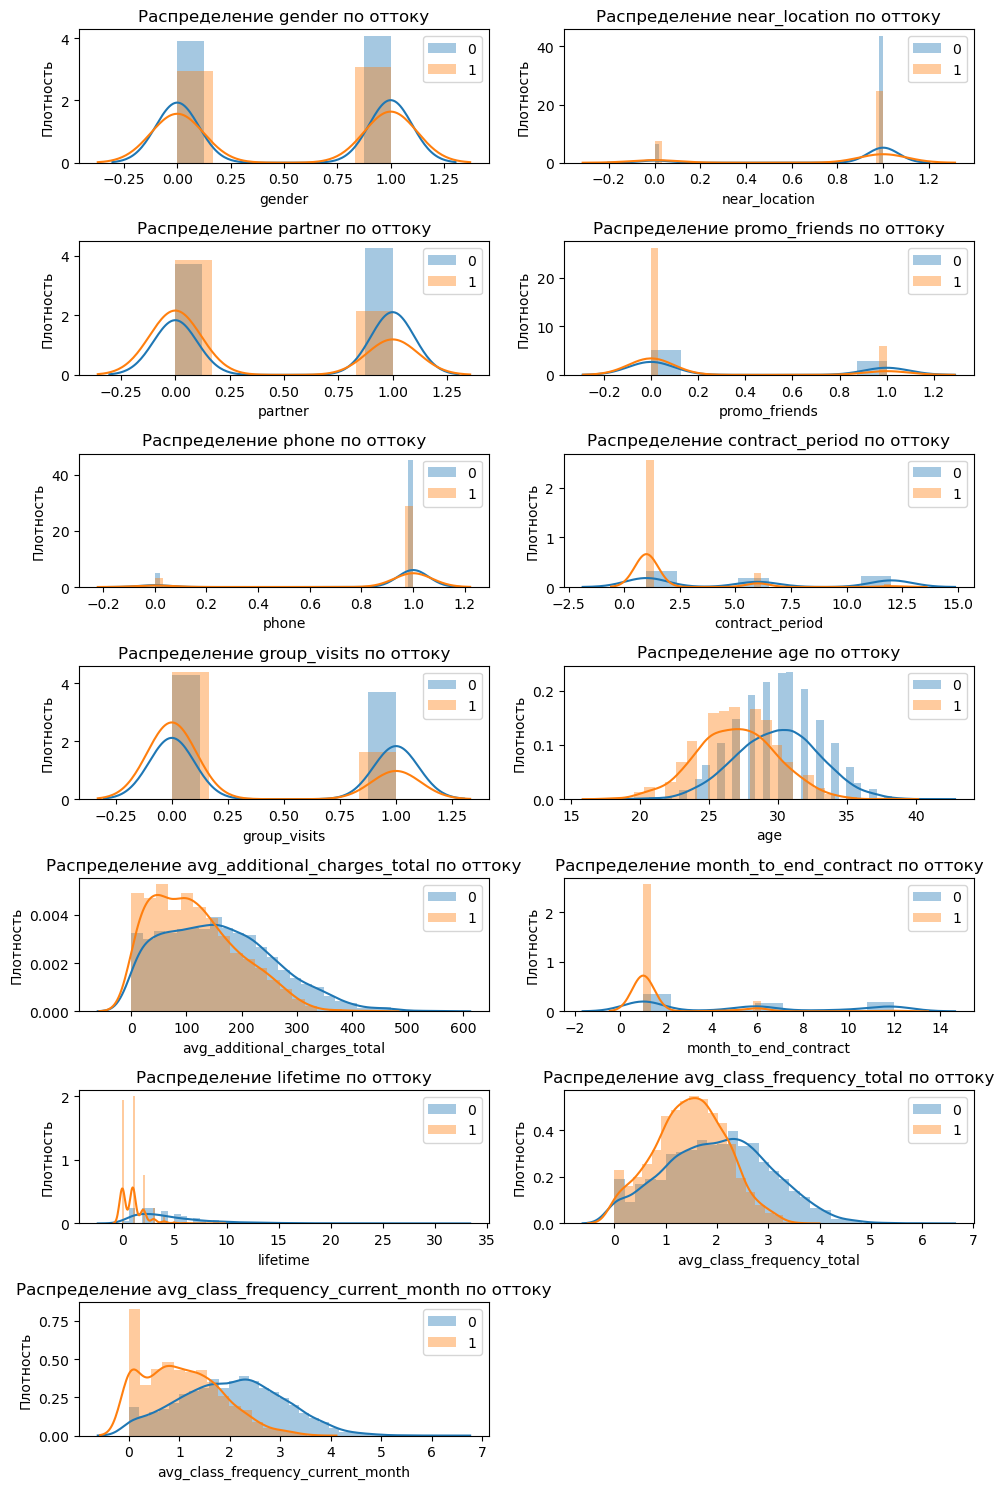

In [14]:
# оключим предупреждения системы
import warnings
warnings.filterwarnings('ignore')
# построим графики распределения признаков в зависимости от оттока
feature = ['gender', 'near_location', 'partner', 'promo_friends', 'phone','contract_period',
           'group_visits', 'age','avg_additional_charges_total', 'month_to_end_contract', 
           'lifetime','avg_class_frequency_total', 'avg_class_frequency_current_month']
col_count, row_count = 2,7
plt.figure(figsize =(10,15))
for i,j in enumerate(feature):
    for churn in gym['churn'].unique():
        gym_churn=gym.query('churn==@churn')
        sns.distplot(gym_churn[j], label=churn, ax=plt.subplot(row_count, col_count, i+1))
        plt.title(f'Распределение {j} по оттоку')
        plt.ylabel('Плотность')
        plt.legend()
plt.tight_layout()
plt.show()      

На получившехся графиках видно, что: 
* для бинарных признаков `gender`, `near_location`, `partner`, `promo_friends`, `phone` и `group_visits` подтверждаются выводы, сделанные на основании средних значений; 
* по признаку `contract_period` основной отток клиентов с месячным абонементом, а клиенты, которые остаются распределены без резких всплесков между 1, 6 и 12 месяцами;
* по признаку `age` отток клиентов приходится на период с 18 до 35 лет с пиковым значением в 27 лет, а остаются в период с 22 до 37 лет с пиковым значением в 31 год, клиенты старше 37 встречаются редко;
* по признаку `avg_additional_charges_total` основной отток клиентов происходит с выручкой от других услуг фитнес-центра до 150, свыше 350 практически не уходят. Оставшиеся клиенты с выручкой до 220 распределены примерно равномерно, с пиковым значением на уровне 158, а вот выручка свыше 500 почти уже не встречается и может быть аномальной. 
* по признаку `month_to_end_contract` основной отток клиентов, если до окончания текущего действующего абонемента остался месяц, а клиенты, которые остаются распределены без резких всплесков между 6 и 12 месяцами и лидерством почти в 2 раза, если до конца абонемента остался месяц;
* по признаку `lifetime` клиенты уходят, которые только обратились первый раз в фитнес-центр или спустя 1 месяц, спустя 5 месяц оттока практически не происходит, а остаются - с пиковым значением на уровне 3 месяцев, а свыше 10 месяцев практически не встречаются и могут быть аномальными;
* по признаку `avg_class_frequency_total` клиенты уходят, если средняя частота посещений в основном 1-2 раза в неделю за все время с начала действия абонемента, если посещение более 3 дней, то оттока практически не происходит, а остаются в основном с посещением от 1 до 3 дней и свыше 4 дней встречаются редко и могут быть аномальными;
* по признаку `avg_class_frequency_current_month` клиенты уходят, если средняя частота посещений 0 или 1 раз в неделю за предыдущий месяц, если посещение более 3 дней, то оттока практически не происходит, а остаются в основном с посещением от 1 до 3 дней и свыше 4 дней встречаются редко и могут быть аномальными.

Для понимания значимости аномальных значений в признаках `avg_additional_charges_total`, `lifetime`, `avg_class_frequency_total`, `avg_class_frequency_current_month` посчитаем 90-й, 95-й и 99-й выборочные перцентили методом `np.percentile()`

In [15]:
# цикл расчета перцентилей для числовых признаков
columns = ['avg_additional_charges_total', 'lifetime',
           'avg_class_frequency_total', 'avg_class_frequency_current_month']
for column in columns:
    print(f'Расчет перцентилей признака {column}:', np.percentile(gym[column], [90, 95, 99])) 

Расчет перцентилей признака avg_additional_charges_total: [277.7171989  323.44087589 400.99612505]
Расчет перцентилей признака lifetime: [ 9. 11. 17.]
Расчет перцентилей признака avg_class_frequency_total: [3.17394282 3.53564837 4.19757925]
Расчет перцентилей признака avg_class_frequency_current_month: [3.17453754 3.54906154 4.18575779]


 В результате полученных данных:
* не более 5% суммарная выручка от других услуг фитнес-центра 323 и не более 1% - 401;
* не более 5% время с момента первого обращения в фитнес-центр 11 месяцев и не более 1% - 17 месяцев;
* не более 5% средняя частота посещений 3,5 раза в неделю за все время с начала действия абонемента и не более 1% - 4.2;
* не более 5% средняя частота посещений 3,5 раза в неделю за предыдущий месяц и не более 1% - 4.2.

В связи с этим можем считать аномальными значениями:
* суммарная выручка от других услуг фитнес-центра свыше 400;
* время с момента первого обращения в фитнес-центр 17 месяцев и больше;
* средняя частота посещений 4.2 раза в неделю за предыдущий месяц и за все время с начала действия абонемента.

Для дальнейшего корректной работы удалим аномальные значения.

In [16]:
# выполним срез значений признаков в таблице, исключив аномальные значения
gym_filter = gym[(gym['avg_additional_charges_total'] < 401) &
                (gym['lifetime'] < 17) &
                (gym['avg_class_frequency_total'] < 4.2) &
                (gym['avg_class_frequency_current_month'] < 4.2)]

In [17]:
gym_filter

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,0


Теперь рассчитаем матрицу корреляций и на её основе построим тепловую карту.

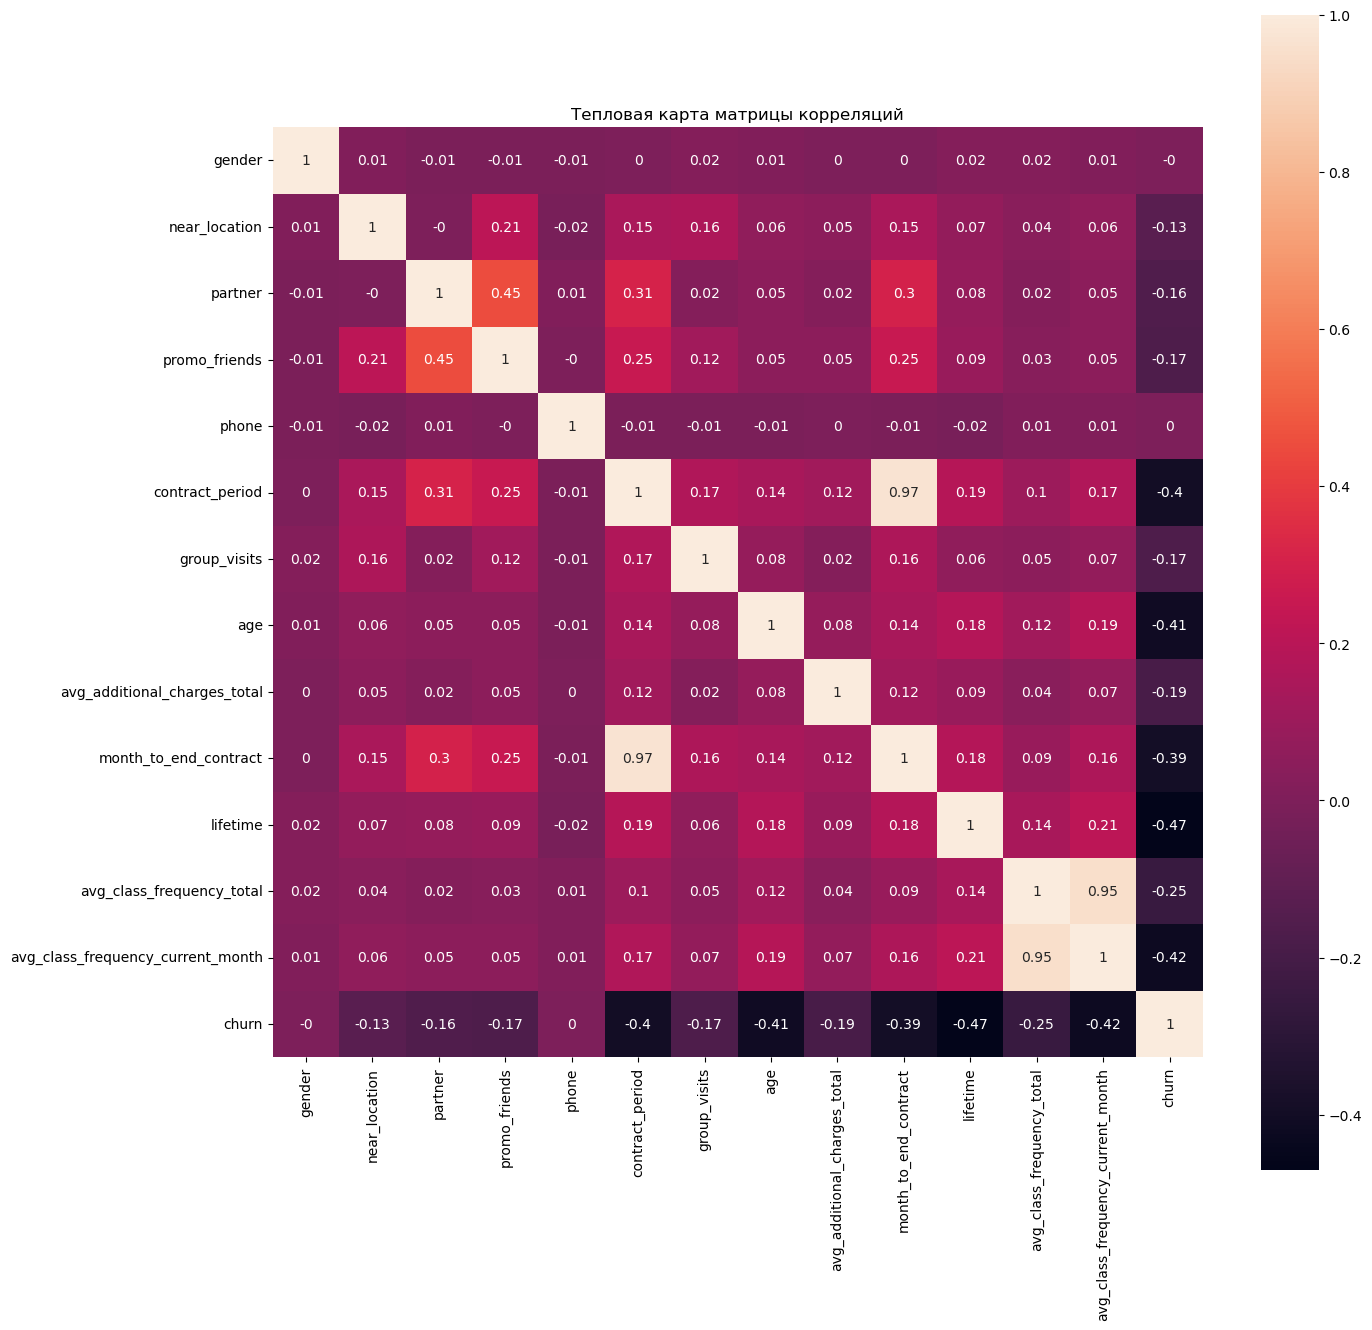

In [18]:
#построим и отрисуем матрицу корреляций
cm = gym_filter.corr().round(2) #вычисляем матрицу корреляций
plt.figure(figsize =(15,15))
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot=True, square=True) 
plt.title('Тепловая карта матрицы корреляций')
plt.show()

На основании полученных данных делаем вывод, что есть значительная взаимосвязь между признаками `avg_class_frequency_current_month` и `avg_class_frequency_total`, а также `month_to_end_contract` и `contract_period`. Чтобы избавиться от мультиколлинеарности, удалим из таблицы по одному из признаков в каждой паре.

In [19]:
# убираем из двух пар коррелирующих признаков по одному признаку
gym_filter = gym_filter.drop(['avg_class_frequency_current_month', 'month_to_end_contract'], axis=1)

In [20]:
# выведем таблицы для проверки корректности выполнения среза и удаления столбцов
display(gym_filter)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.284497,0
3996,0,1,0,0,1,1,1,29,68.883764,1,1.277168,1
3997,1,1,1,1,1,12,0,28,78.250542,2,2.786146,0
3998,0,1,1,1,1,6,0,32,61.912657,3,1.630108,0


### Вывод

1. Признаки `gender`и `phone` не влияют на отток клиентов.


2. Основной отток клиентов:
* по бинарному признаку `near_location` в среднем на 10% происходит чаще, если они не проживают или не работают в районе, где находится фитнес-центр;
* по бинарному признаку `partner` в среднем на 18% происходит чаще, если клиент не является сотрудником компании-партнёра клуба;
* по бинарному признаку `promo_friends` в среднем на 17% происходит чаще, если клиент не пользовался промо-кодом от знакомого при оплате первого абонемента;
* по признаку `contract_period` с месячным абонементом;
* по бинарному признаку `group_visits` в среднем на 20% происходит чаще, если клиент не посещает групповые занятия;
* по признаку `age` в 27 лет;
* по признаку `avg_additional_charges_total` с выручкой от других услуг фитнес-центра до 150;
* по признаку `month_to_end_contract`, если до окончания текущего действующего абонемента остался месяц;
* по признаку `lifetime`, которые только обратились первый раз в фитнес-центр или спустя 1 месяц;
* по признаку `avg_class_frequency_total`, если средняя частота посещений 1-2 раза в неделю за все время с начала действия абонемента;
* по признаку `avg_class_frequency_current_month`, если средняя частота посещений 0 или 1 раз в неделю за предыдущий месяц.


3. Из данных удалили аномальные значения:
* суммарную выручку от других услуг фитнес-центра свыше 400;
* время с момента первого обращения в фитнес-центр 17 месяцев и больше;
* среднюю частоту посещений 4.2 раза в неделю за предыдущий месяц и за все время с начала действия абонемента.


4. Избавились от мультиколлинеарности с помощью удаления столбцов `avg_class_frequency_current_month` и `month_to_end_contract`.

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

In [21]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_filter.drop(['churn'], axis=1)
y = gym_filter['churn']

Функцией `train_test_split()` разделим выборку на обучающую и валидационную в соотношении 80:20.

In [22]:
#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим модель на train-выборке двумя способами:
* логистической регрессией,
* случайным лесом.

Для начала проведем стандартизацию данных. Для этого обучим `StandardScaler()` и примените его к обучающей матрице признаков методом `fit_transform()`, а затем выведем первые 5 элементов этой матрицы со стандартизированными значениями. Затем применим стандартизацию к тестовым данным.

In [23]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler() 
#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 
# выводим 5 элементов матрицы
print(X_train_st[:5])
#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

[[-1.02088998  0.42623865  1.03685439 -0.66888364  0.31964291 -0.80876254
  -0.82454216  0.87111492  0.73895336 -0.15060796  0.45572742]
 [ 0.97953748 -2.34610351  1.03685439 -0.66888364 -3.12849108 -0.80876254
  -0.82454216  1.17668616  0.41371528  0.45891131  0.25168619]
 [-1.02088998  0.42623865  1.03685439 -0.66888364  0.31964291 -0.80876254
  -0.82454216  0.25997243  0.06771493 -0.76012722 -0.09333211]
 [ 0.97953748  0.42623865 -0.96445558 -0.66888364  0.31964291 -0.80876254
  -0.82454216  1.4822574  -1.11163797 -0.76012722 -0.43901506]
 [ 0.97953748  0.42623865 -0.96445558 -0.66888364  0.31964291  0.29497052
  -0.82454216 -0.96231254 -0.10093946  0.76367094  0.9399728 ]]


Напишем функцию, которая будет обучать каждую модель на train-выборке, делать прогноз на тестовых данных и выводить метрики `accuracy`, `precision` и `recall`.

In [24]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)    # запуск модели обучения
    y_pred = model.predict(X_test) # рассчет прогноза
    print(
        'accuracy:{:.2f} precision:{:.2f} recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            accuracy_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [25]:
# выведим метрики для каждой модели, используя стандартизированные данные
print('Логическая регрессия')
make_prediction(LogisticRegression(random_state=0), 
                X_train_st, y_train, X_test_st, y_test)  
print()
print('Случайный лес')
make_prediction(RandomForestClassifier(n_estimators = 100, random_state=0), 
                X_train_st, y_train, X_test_st, y_test) 

Логическая регрессия
accuracy:0.90 precision:0.90 recall:0.80

Случайный лес
accuracy:0.89 precision:0.89 recall:0.75


Логическая регрессия и случайный лес оказались практически равносильны в части доли правильных ответов (90% и 89%) и точности (90% и 89%), но логическая регрессия обнаружила на 5% больше реальных объектов "1" класса.

Заново обучим лучшую модель и сделаем прогноз.

In [26]:
# обучим финальную модель
final_model = LogisticRegression(random_state=0)
final_model.fit(X_train_st, y_train)
y_pred = final_model.predict(X_test_st)

In [27]:
# создадим датафрейм с именами признаков и их важностью и выведем его по убыванию важности
features = pd.DataFrame({'feature': X_train.columns, 
                         'weights': final_model.coef_[0]})
features['weights_abs'] = [abs(i) for i in features['weights']]

print(features.sort_values(by='weights_abs', ascending=False))

                         feature   weights  weights_abs
9                       lifetime -3.426381     3.426381
5                contract_period -1.315956     1.315956
7                            age -1.169238     1.169238
10     avg_class_frequency_total -0.663281     0.663281
8   avg_additional_charges_total -0.485395     0.485395
6                   group_visits -0.408496     0.408496
3                  promo_friends -0.164748     0.164748
4                          phone -0.112984     0.112984
1                  near_location -0.099770     0.099770
2                        partner -0.076360     0.076360
0                         gender  0.010808     0.010808


С помощью данной модели были выявлены 3 наиболее важных признака для прогнозирования оттока: 
* время с момента первого обращения в фитнес-центр;
* длительность текущего действующего абонемента;
* возраст.

### Вывод

Клиенты с наибольшей вероятностью оттока в следующем месяце: 
* при первом обращении в фитнес-центр или спустя месяц;
* с месячным абонементом;
* в возрасте 27 лет.

## Кластеризация клиентов

Теперь проведем кластеризацию объектов (клиентов). Для начала выполним стандартизацию и передадим получившуюся стандартизированную таблицу в качестве параметра функции `linkage()`, с помощью которой построим матрицу расстояний. Чтобы диаграмма получилась показательной, передадим параметру `method` значение `'ward'` (алгоритм минимизации дисперсии Уорда).

In [28]:
# стандартизируем данные перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(gym_filter.drop(['churn'], axis=1))

In [29]:
# формируем матрицу расстояний
linked = linkage(X_sc, method = 'ward')

В переменной `linked` сохранили таблицу «связок» между объектами. Её визуализируем как дендрограмму:

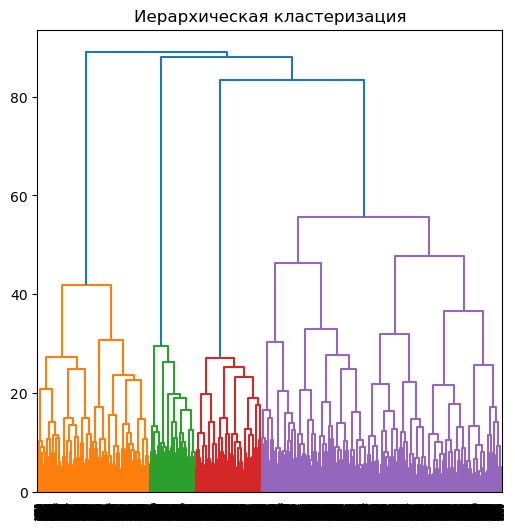

In [30]:
# отрисовываем дендрограмму
plt.figure(figsize=(6, 6))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

На графике отчетливо видно, что можно выделить 4 кластера. 

Теперь обучим модель кластеризации на основании алгоритма `K-Means` и спрогнозируем кластеры клиентов.

In [31]:
# задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=5, random_state=0) 
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)  
labels = km.fit_predict(X_sc) 
# сохраняем метки кластера в поле нашего датасета
gym_filter['cluster_km'] = labels
# выведем первые 10 строк, полученной таблицы
display(gym_filter.head(10))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398,0,4
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936,0,2
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098,0,3
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633,0,0
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884,0,0
6,1,1,1,1,0,6,1,32,94.266389,2,1.138941,0,4
7,0,1,0,0,1,1,0,30,217.786641,0,1.213502,1,3
8,1,1,1,1,1,1,1,23,45.409909,1,1.106239,0,0
9,0,1,0,0,1,1,0,31,65.310836,11,1.810852,0,3
10,0,1,0,0,0,6,1,32,229.708945,3,1.641180,0,4


In [32]:
# посчитаем метрику силуэта для нашей кластеризации
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


Значение метрики силуэта показывает не очень большое значение, т.е. только на 14% объект своего класса похож на свой кластер больше, чем на чужой. Теперь посмотрим на средние значения признаков для кластеров.

In [33]:
# выводим статистику по средним значениям наших признаков по кластеру
clusters = gym_filter.groupby(['cluster_km']).mean()
display(clusters)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.491803,0.994536,0.953005,0.990164,1.0,7.234973,0.495082,29.501639,150.712929,4.195628,1.911499,0.136612
1,0.500917,0.000000,0.489908,0.078899,1.0,2.998165,0.229358,28.686239,133.557396,2.893578,1.745938,0.411009
2,0.546108,1.000000,0.255090,0.079042,1.0,4.519760,1.000000,29.553293,143.616699,3.506587,1.912726,0.209581
3,0.502504,1.000000,0.299666,0.054257,1.0,3.505843,0.000000,28.805509,142.703729,3.229549,1.809243,0.361436
4,0.525199,0.862069,0.466844,0.310345,0.0,4.750663,0.419098,29.289125,143.123712,3.673740,1.832016,0.273210


На основании полученных данных можно сделать следующие выводы:
1. в 0 кластер попадают наблюдения:
   * с признаком `near_location = 1` составляет 99,5%, т.е. практически все клиенты проживают и работают в районе, где находится фитнес-центр;
   * только с признаком `phone = 1`, т.е. у клиента есть контактный телефон;
   * признак `partner = 1` составляет 95%, т.е. практически все клиенты сотрудники компании-партнёров клуба;
   * признак `promo_friends = 1` составляет 99%, т.е. большая часть клиентов воспользовалась промо-кодом от знакомого при оплате первого абонемента;
   * с признаком `contract_period` с большим количеством 6 и 12 месяц;
   * остальные признаки имеют влияние, но не имеют явновыраженного значения отличного от других кластеров.
2. в 1 кластер попадают наблюдения:
   * только с признаком `near_location = 0`, т.е. клиент не проживает и не работает в районе, где находится фитнес-центр;
   * только с признаком `phone = 1`, т.е. у клиента есть контактный телефон;
   * признак `promo_friends = 1` составляет 7%, т.е. большая часть клиентов не использовала промо-код от знакомого при оплате первого абонемента;
   * с признаком `contract_period` в основном 1 месяц;
   * остальные признаки имеют влияние, но не имеют явновыраженного значения отличного от других кластеров;
3. во 2 кластер попадают наблюдения:
   * только с признаком `near_location = 1`, т.е. клиент проживает или работает в районе, где находится фитнес-центр;
   * только с признаком `phone = 1`, т.е. у клиента есть контактный телефон;
   * признак `promo_friends = 1` составляет 7%, т.е. большая часть клиентов не использовала промо-код от знакомого при оплате первого абонемента;
   * только с признаком `group_visits = 1`, т.е. клиент посещает групповые занятия;
   * остальные признаки имеют влияние, но не имеют явновыраженного значения отличного от других кластеров;
4. в 3 кластер попадают наблюдения:
   * только с признаком `near_location = 1`, т.е. клиент проживает или работает в районе, где находится фитнес-центр;
   * признак `promo_friends = 1` составляет 5%, т.е. большая часть клиентов не использовала промо-код от знакомого при оплате первого абонемента;
   * только с признаком `phone = 1`, т.е. у клиента есть контактный телефон;
   * с признаком `contract_period` в основном 1 месяц;
   * только с признаком `group_visits = 0`, т.е. клиент не посещает групповые занятия;
   * остальные признаки имеют влияние, но не имеют явновыраженного значения отличного от других кластеров;  
4. в 4 кластер попадают наблюдения:
   * только с признаком `phone = 0`, т.е. у клиента отсутсвует контактный телефон;
   * остальные признаки имеют влияние, но не имеют явновыраженного значения отличного от других кластеров;

Теперь построим распределения признаков для кластеров.

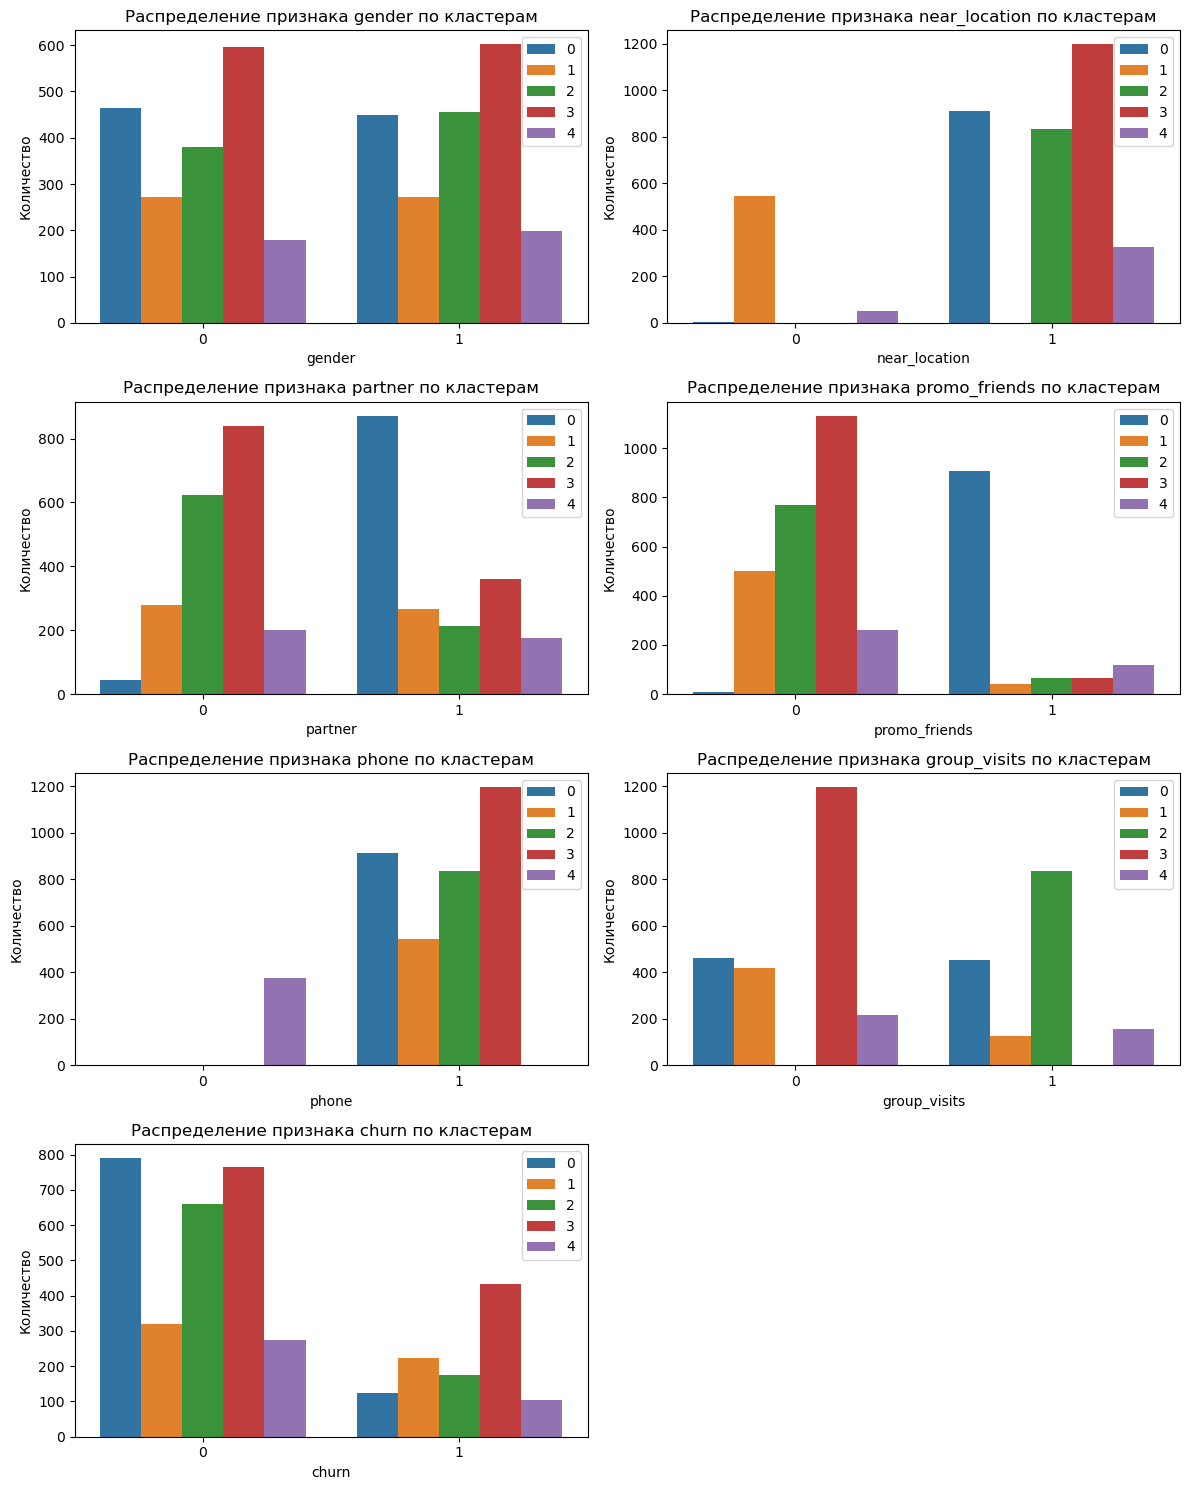

In [34]:
# построим графики распределения для бинарных признаков по каждому кластеру
categorical_columns = ['gender', 'near_location', 'partner', 'promo_friends', 
                       'phone', 'group_visits', 'churn']
col_count, row_count = 2,4
plt.figure(figsize =(12,15))
for i,j in enumerate(categorical_columns):
    sns.countplot(x=gym_filter[j], hue='cluster_km', data=gym_filter, 
                  ax=plt.subplot(row_count, col_count, i+1))
    plt.title(f'Распределение признака {j} по кластерам')
    plt.ylabel('Количество')
    plt.legend()
plt.tight_layout()     
plt.show()  

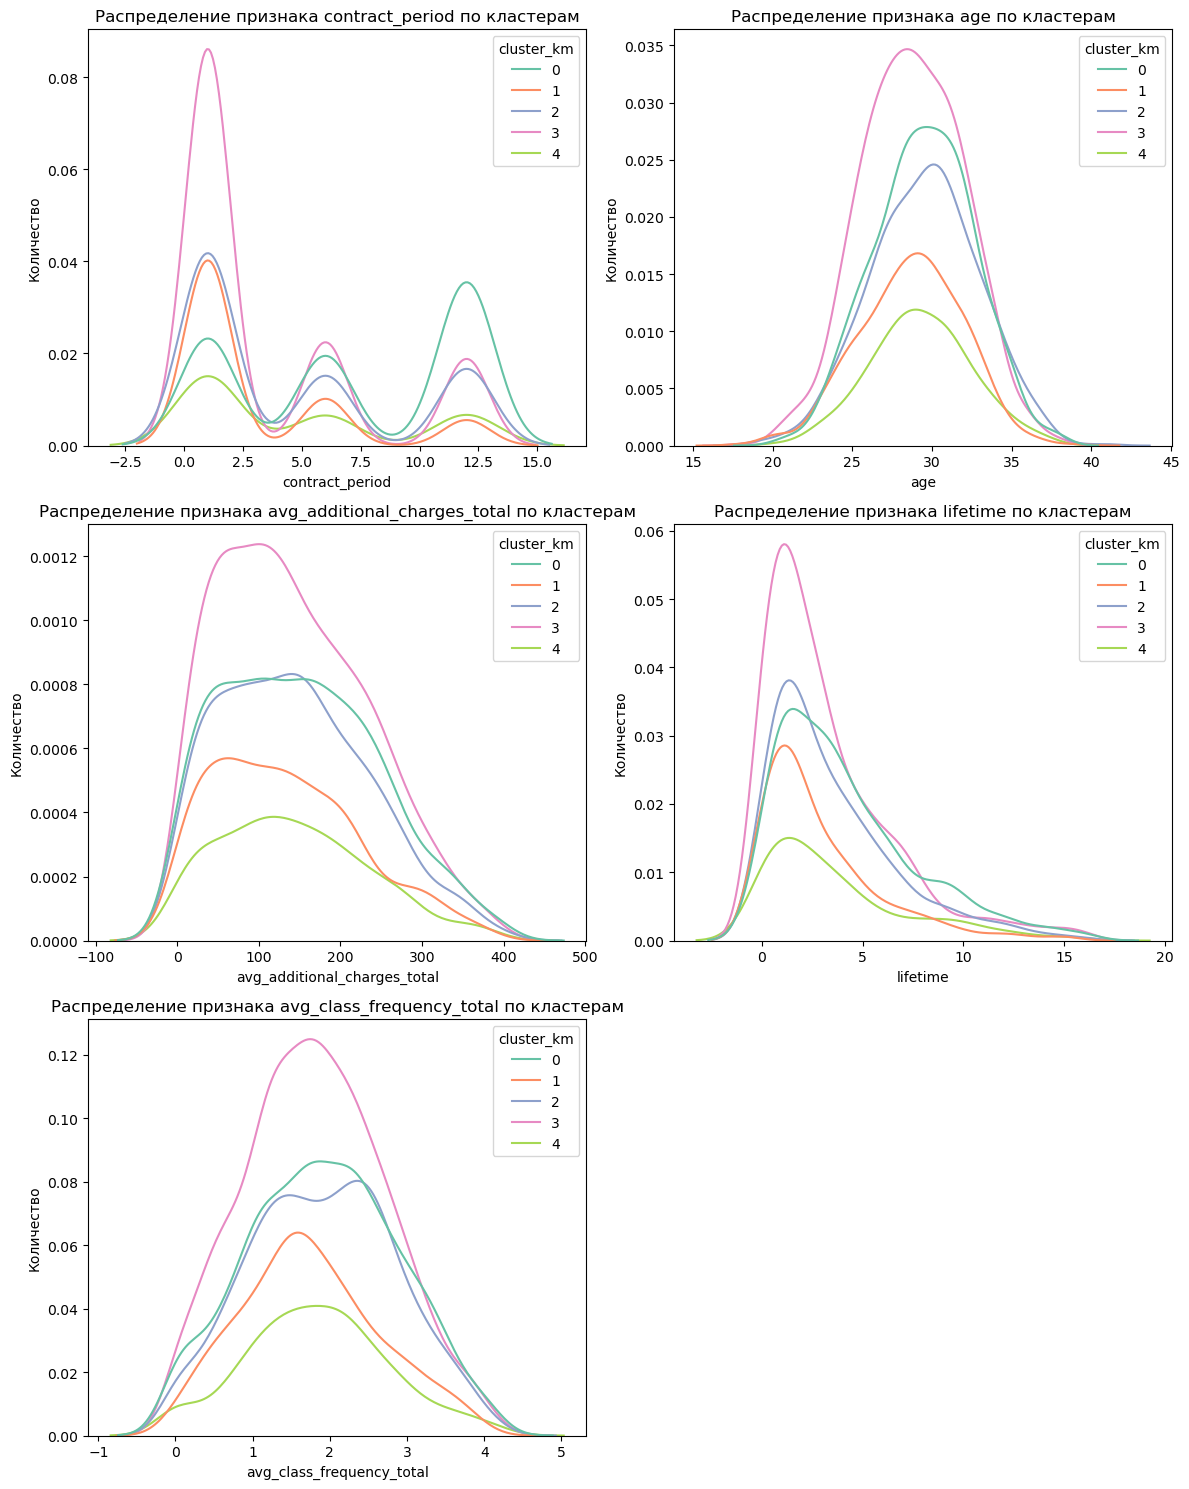

In [35]:
# построим графики распределения для числовых признаков по каждому кластеру
int_columns = ['contract_period', 'age','avg_additional_charges_total', 
               'lifetime', 'avg_class_frequency_total']
col_count, row_count = 2,3
plt.figure(figsize =(12,15))
for i,j in enumerate(int_columns):
    sns.kdeplot(x=gym_filter[j], hue='cluster_km', data=gym_filter, 
                ax=plt.subplot(row_count, col_count, i+1), palette="Set2")
    plt.title(f'Распределение признака {j} по кластерам')
    plt.ylabel('Количество')    
plt.tight_layout()     
plt.show()

На графиках видно, что распределения для бинарных признаков `gender`, `near_location`, `partner`, `promo_friends`, `phone`, `group_visits`, `churm` и для числовых признаков `contract_period`, `age`, `avg_additional_charges_total`, `lifetime`, `avg_class_frequency_total` подтверждаются выводы, сделанные на основании средних значений. 

И в заключении для каждого полученного кластера посчитаем долю оттока.

In [36]:
# для каждого кластера рассчитаем количество клиентов в зависимости от оттока
gym_churn = (
    gym_filter[['cluster_km', 'churn']] 
    .groupby(['cluster_km', 'churn']) # группировка по кластеру и оттоку
    .agg({'churn':'count'})     # подсчет количества
    .rename(columns={'churn':'churn_count'}) # переименование столбца
    .reset_index() # избавление от мультииндекса
)
# для каждого кластера рассчитаем общее количество клиентов
gym_cluster = (
    gym_churn[['cluster_km', 'churn_count']]
    .groupby('cluster_km').sum() # группировка по кластеру и суммирование
    .rename(columns={'churn_count':'churn_cluster_total'}) # переименование столбца
    .reset_index()  # избавление от мультииндекса
)
# добавим в таблицу gym_churn столбец с общим количеством клиентов в зависимости от кластера
gym_churn = gym_churn.merge(gym_cluster, on='cluster_km', how='left')
# рассчитаем долю оттока для каждого кластера
gym_churn['share,%'] = (gym_churn['churn_count']/gym_churn['churn_cluster_total']*100).round(2)
# отобразим таблицу gym_churn с сортировкой по наличию оттока и его долей по убыванию
display(gym_churn.sort_values(by=['churn', 'share,%'], ascending=False))    

,cluster_km,churn,churn_count,churn_cluster_total,"share,%"
3,1,1,224,545,41.10
7,3,1,433,1198,36.14
9,4,1,103,377,27.32
5,2,1,175,835,20.96
1,0,1,125,915,13.66
0,0,0,790,915,86.34
4,2,0,660,835,79.04
8,4,0,274,377,72.68
6,3,0,765,1198,63.86
2,1,0,321,545,58.90


Согласно результатам расчетов 1 и 3 кластера больше всего подвержен оттоку, а 0 кластер оказался самый надежный.

### Вывод

Клиенты делятся на 5 кластеров:
0. Клиенты, которые:
   * оставляют контактный телефон;
   * проживают или работают в районе, где находится фитнес-центр;
   * с абонементом 6 или 12 месяц; 
   * сотрудники компании-партнёров клуба;
   * воспользовалась промо-кодом от знакомого при оплате первого абонемента;
1. Клиенты, которые:
   * оставляют контактный телефон;
   * не проживают и не работают в районе, где находится фитнес-центр;
   * с месячным абонементом;
   * не пользуются акцией «приведи друга»
2. Клиенты, которые:
   * оставляют контактный телефон;
   * проживают или работают в районе, где находится фитнес-центр;
   * посещают групповые занятия;
   * не пользуются акцией «приведи друга»   
3. Клиенты, которые:
   * оставляют контактный телефон;
   * проживают или работают в районе, где находится фитнес-центр;
   * с месячным абонементом;
   * не посещают групповые занятия;
   * не пользуются акцией «приведи друга;  
4. Клиенты, которые не оставляют контактный телефон.


3. Признаки, которые оказали наибольшее влияние на деление наблюдений на кластеры:
    * `near_location` на 0, 1, 2 и 3 кластер;
    * `phone` на все 5 кластеров;
    * `contract_period` на 0, 1 и 3 кластер;
    * `partner` на 0 кластер;
    * `promo_friends` на 0, 1, 2 и 3 кластер;
    * `group_visits` на 2 и 3 кластер;


4. Самый надежный - 0 кластер;


5. Наибольший отток в 1 и 3 кластерах.

## Общий вывод

Клиенты с наибольшей вероятностью оттока в следующем месяце: 
* при первом обращении в фитнес-центр или спустя месяц;
* с месячным абонементом;
* в возрасте 27 лет.

Также можно выделить 5 групп:
0. Клиенты, которые:
   * оставляют контактный телефон;
   * проживают или работают в районе, где находится фитнес-центр;
   * с абонементом 6 или 12 месяц; 
   * сотрудники компании-партнёров клуба;
   * воспользовалась промо-кодом от знакомого при оплате первого абонемента;
1. Клиенты, которые:
   * оставляют контактный телефон;
   * не проживают и не работают в районе, где находится фитнес-центр;
   * с месячным абонементом;
   * не пользуются акцией «приведи друга»
2. Клиенты, которые:
   * оставляют контактный телефон;
   * проживают или работают в районе, где находится фитнес-центр;
   * посещают групповые занятия;
   * не пользуются акцией «приведи друга»   
3. Клиенты, которые:
   * оставляют контактный телефон;
   * проживают или работают в районе, где находится фитнес-центр;
   * с месячным абонементом;
   * не посещают групповые занятия;
   * не пользуются акцией «приведи друга;  
4. Клиенты, которые не оставляют контактный телефон.


Самые надежные клиенты в 0 группе, наибольший отток в 1 и 3 группе.


Основные признаки, наиболее сильно влияющие на отток:
* факт первоначальной записи в рамках акции «приведи друга»;
* длительность текущего действующего абонемента (1 месяц).


Рекомендации по повышению качества работы с клиентами и их удержания:
1. необходимо выяснить причины оттока спустя месяц (например, некорректное поведение персонала, состояние/наличие спортивного инвентаря, состояние/размер помещений, наличие кондиционеров в залах, вероятность краж личного имущества и т.п.);
2. вывести из оборота месячные абонементы, например для начала можно изменить длительность на 3, 6 и 12 месяцев;
3. провести работу по увеличению компаний-партнёров клуба;
4. увеличить продвижение акции «приведи друга» среди действующих клиентов;
5. расширить географию с помощью создания сети фитнес-центров.